# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from scipy.stats import spearmanr

# Set the font size globally
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

# Google Analytics Data - Countries

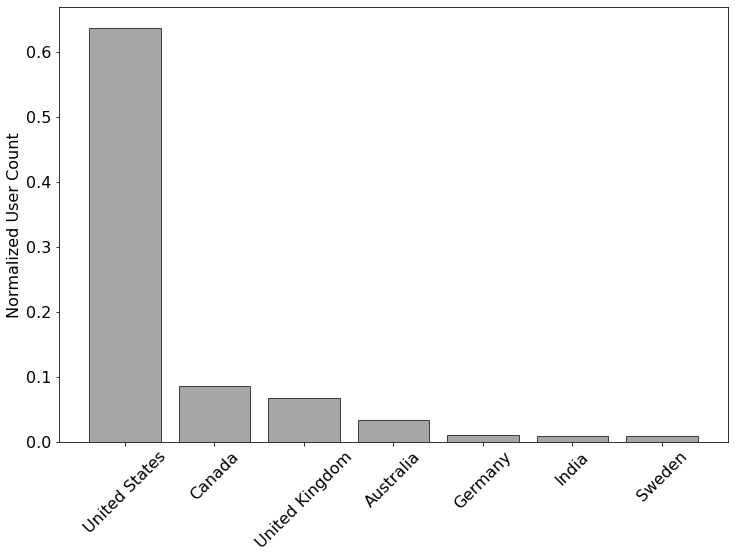

In [34]:
ga_countries = pd.read_csv('analytics_country_data.csv')
ga_countries ['users'] = ga_countries ['users'].str.replace(',', '').astype(int)
ga_countries ['new_users'] = ga_countries ['new_users'].str.replace(',', '').astype(int)
ga_countries ['sessions'] = ga_countries ['sessions'].str.replace(',', '').astype(int)

# Remove the percentage sign and convert to float
ga_countries ['bounce_rate'] = ga_countries ['bounce_rate'].str.rstrip('%').astype(float) / 100

# Convert pages_per_session to float
ga_countries ['pages_per_session'] = ga_countries ['pages_per_session'].astype(float)

# Convert session_duration to total seconds
def duration_to_seconds(duration_str):
    h, m, s = duration_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

plt.figure(figsize=(12,8))
ga_countries ['session_duration'] = ga_countries ['session_duration'].apply(duration_to_seconds)
ga_countries['users_ratio'] = ga_countries['users']/ga_countries['users'].sum()
plt.bar(ga_countries[0:7]['country'],ga_countries[0:7]['users_ratio'],color='gray',alpha=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Normalized User Count')
plt.savefig('countries_ga.pdf', format='pdf', bbox_inches='tight',dpi=1200)

# Google Analytics Data - Users

In [36]:
ga_users = pd.read_csv('analytics_daily_users.csv')
# Remove commas for 'users', 'new_users', and 'sessions'
ga_users['users'] = ga_users['users'].str.replace(',', '').astype(int)
ga_users['new_users'] = ga_users['new_users'].str.replace(',', '').astype(int)
ga_users['sessions'] = pd.to_numeric(ga_users['sessions'].str.replace(',', ''), errors='coerce')

# Convert 'sessions_per_user' and 'pages_per_session' to float
ga_users['sessions_per_user'] = ga_users['sessions_per_user'].astype(float)
ga_users['pages_per_session'] = ga_users['pages_per_session'].astype(float)

# Convert 'session_duration' to total seconds
def duration_to_seconds(duration_str):
    if pd.isna(duration_str):
        return None
    h, m, s = duration_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

ga_users['session_duration'] = ga_users['session_duration'].apply(duration_to_seconds)

# Remove the percentage sign and convert to float for 'bounce_rate'
ga_users['bounce_rate'] = ga_users['bounce_rate'].str.rstrip('%').astype(float) / 100

# Convert 'pageviews' to numeric, handle 'NaN' strings
ga_users['pageviews'] = pd.to_numeric(ga_users['pageviews'].str.replace(',', ''), errors='coerce')

# Convert the 'date' column to datetime objects
ga_users['date'] = pd.to_datetime(ga_users['date'])

# Adding weekly perioed
ga_users['week_start'] = ga_users['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Normed measure
ga_users['normed_users'] = (ga_users['users'] - ga_users['users'].min())/ (ga_users['users'].max() - ga_users['users'].min())
ga_users['normed_new_users'] = (ga_users['new_users'] - ga_users['new_users'].min())/ (ga_users['new_users'].max() - ga_users['new_users'].min())
ga_users['new_old_users_ratio'] = ga_users['new_users']/ga_users['users']
ga_users['new_old_users_subt'] = ga_users['users'] - ga_users['new_users']
ga_users.head()

,date,users,new_users,sessions_per_user,sessions,session_duration,bounce_rate,pageviews,pages_per_session,week_start,normed_users,normed_new_users,new_old_users_ratio,new_old_users_subt
0,2013-01-01,67283,17706,1.05,68825.0,106,0.8000,82590.0,1.15,2012-12-31,0.000000,0.000000,0.263157,49577
1,2013-01-02,123942,53118,1.03,NaN,85,0.7222,NaN,1.44,2012-12-31,0.006017,0.006321,0.428571,70824
2,2013-01-03,194766,88530,1.13,NaN,65,0.7742,NaN,1.31,2012-12-31,0.013539,0.012642,0.454545,106236
3,2013-01-04,237261,123942,1.09,NaN,129,0.8767,NaN,1.15,2012-12-31,0.018052,0.018963,0.522387,113319
4,2013-01-05,134566,60200,1.13,NaN,95,0.7674,NaN,1.26,2012-12-31,0.007146,0.007585,0.447364,74366


In [37]:

mean_pages_per_session = np.round(ga_users['pages_per_session'].mean(), 2)
std_pages_per_session = np.round(ga_users['pages_per_session'].std(), 2)

mean_bounce_rate = np.round(ga_users['bounce_rate'].mean(), 2)
std_bounce_rate = np.round(ga_users['bounce_rate'].std(), 2)

print("People typically read 1-2 articles, since the mean number of pages per session is",
      mean_pages_per_session, "±", std_pages_per_session,
      "and the mean bounce rate is", mean_bounce_rate, "±", std_bounce_rate)

People typically read 1-2 articles, since the mean number of pages per session is 1.33 ± 0.13 and the mean bounce rate is 0.58 ± 0.35


## New to old user ratio

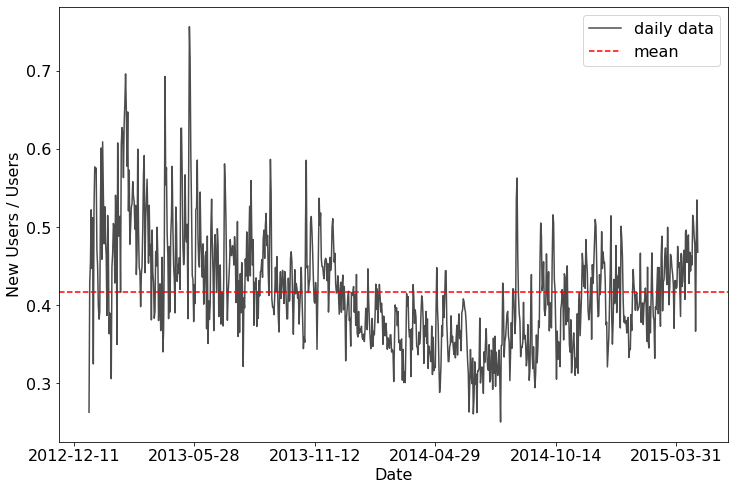

In [38]:
plt.figure(figsize=(12,8))
plt.plot(ga_users['date'],ga_users['new_old_users_ratio'],label = 'daily data',color='black',alpha=0.7)
plt.axhline(ga_users['new_old_users_ratio'].mean(),color='red',label='mean',linestyle='--')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=24))  # Show a tick every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.ylabel('New Users / Users',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend()
plt.savefig('user_ratio_ga.pdf', format='pdf', bbox_inches='tight',dpi=1200)

In [39]:
print('Mean of ratio of new to all users is', np.round(ga_users['new_old_users_ratio'].mean(), 2), "±", np.round(ga_users['new_old_users_ratio'].std(), 2))

print("At max it is", np.round(ga_users['new_old_users_ratio'].max(), 2), "while at its min it is", np.round(ga_users['new_old_users_ratio'].min(), 2))


Mean of ratio of new to all users is 0.42 ± 0.07
At max it is 0.76 while at its min it is 0.25


In [40]:
print("People typically read 1-2 articles, since the mean number of pages per session is", np.round(ga_users['pages_per_session'].mean(),2),'and the mean bounce rate is',np.round(ga_users['bounce_rate'].mean(),2))

People typically read 1-2 articles, since the mean number of pages per session is 1.33 and the mean bounce rate is 0.58


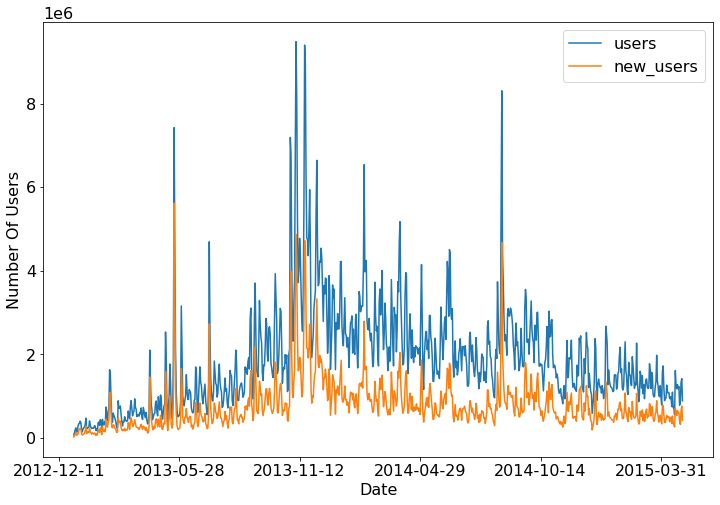

In [41]:
plt.figure(figsize=(12,8))
plt.plot(ga_users['date'],ga_users['users'],label = 'users')
plt.plot(ga_users['date'],ga_users['new_users'],label = 'new_users')
# Set major ticks format
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=24))  # Show a tick every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.ylabel('Number Of Users',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend()
plt.savefig('new_users_users_ga.pdf', format='pdf', bbox_inches='tight',dpi=1200)

# Google Analytics and Daily Aggregated Measures

In [54]:
# Load and process the data
df = pd.read_csv('packages.csv')
df = df.drop(['first_place','winner','slug','share_text','headline', 'excerpt', 'lede'],axis=1 )
df['created_at']= pd.to_datetime(df['created_at'], format='%Y-%m-%d')

# Setting which measure to aggregate and how
aggregations = {
    'impressions': 'sum',
    'clicks': 'sum'}

# Exclude non-numeric columns that you do not want to sum or average
non_numeric_columns = ['test_week', 'test_id']
aggregations.update({col: 'first' for col in non_numeric_columns})

# Group by 'created_at' and apply the aggregation
df_daily_agg = df.groupby('created_at').agg(aggregations).reset_index()
df_daily_agg = df_daily_agg.sort_values(by='created_at')
df_daily_agg = df_daily_agg.set_index('created_at')
complete_date_range = pd.date_range(start=df_daily_agg.index.min(), end=df_daily_agg.index.max(), freq='D')

# Reindex the DataFrame with the complete date range
df_daily_agg_reindexed = df_daily_agg.reindex(complete_date_range)

# Fill in the missing values, here we use forward-fill as an example
df_daily_agg_filled = df_daily_agg_reindexed.ffill()
df_daily_agg = df_daily_agg_filled.reset_index().rename(columns={'index': 'created_at'})
df_daily_agg['daily_ctr'] = df_daily_agg['clicks']/df_daily_agg['impressions']
df_daily_agg

,created_at,impressions,clicks,test_week,test_id,daily_ctr
0,2013-01-24,48187.0,1115.0,2013-01-21,5143608c220cb800020009cd,0.023139
1,2013-01-25,19287.0,390.0,2013-01-21,5143607a220cb800020008c2,0.020221
2,2013-01-26,3045.0,98.0,2013-01-21,5143608e220cb800020009ed,0.032184
3,2013-01-27,10207.0,360.0,2013-01-28,5143607a220cb800020008c0,0.035270
4,2013-01-28,10207.0,360.0,2013-01-28,5143607a220cb800020008c0,0.035270
...,...,...,...,...,...,...
822,2015-04-26,24407.0,258.0,2015-04-27,5538f0e3653733000ca50000,0.010571
823,2015-04-27,363760.0,3341.0,2015-04-27,553e3e5a376561002c110100,0.009185
824,2015-04-28,728354.0,5164.0,2015-04-27,553faeb2336438001c7f0100,0.007090
825,2015-04-29,497076.0,3235.0,2015-04-27,55403be0393131002cf60000,0.006508


In [55]:
# Merge the dataset
ga_users = ga_users[['date','users','new_users','new_old_users_ratio']]
merged_df = pd.merge(ga_users, df_daily_agg, left_on='date', right_on='created_at', how='inner')
merged_df = pd.merge(merged_df,ga_pageviews,on='date',how='inner')

# List of columns to consider for correlation
cols = ['users', 'pageviews', 'daily_ctr', 'new_users','impressions']

# Initialize an empty DataFrame for correlation coefficients
corr_matrix = pd.DataFrame(index=cols, columns=cols)

# Initialize an empty DataFrame for p-values
p_values = pd.DataFrame(index=cols, columns=cols)

# Compute the Spearman correlation for each pair of variables
for col1 in cols:
    for col2 in cols:
        corr, p = spearmanr(merged_df[col1], merged_df[col2])
        corr_matrix.loc[col1, col2] = corr
        p_values.loc[col1, col2] = p

# Function to apply asterisks for significance
def apply_significance(val):
    if val < 0.001:
        return '***'
    elif val < 0.01:
        return '**'
    elif val < 0.05:
        return '*'
    else:
        return ''


# Apply the significance function to the p-values
significance_matrix = p_values.applymap(apply_significance)

# Combine the correlation coefficients with the significance levels
corr_with_significance = corr_matrix.astype(float).round(2).astype(str) + significance_matrix

# Display the resulting DataFrame
corr_with_significance


,users,pageviews,daily_ctr,new_users,impressions
users,1.0***,0.99***,-0.01,0.96***,0.53***
pageviews,0.99***,1.0***,-0.01,0.93***,0.54***
daily_ctr,-0.01,-0.01,1.0***,-0.01,-0.23***
new_users,0.96***,0.93***,-0.01,1.0***,0.5***
impressions,0.53***,0.54***,-0.23***,0.5***,1.0***


# Combined Figure

C:\Users\lukab\AppData\Local\Temp/ipykernel_17112/111475498.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(ga_countries[0:7]['country'], rotation=45, fontsize=14)


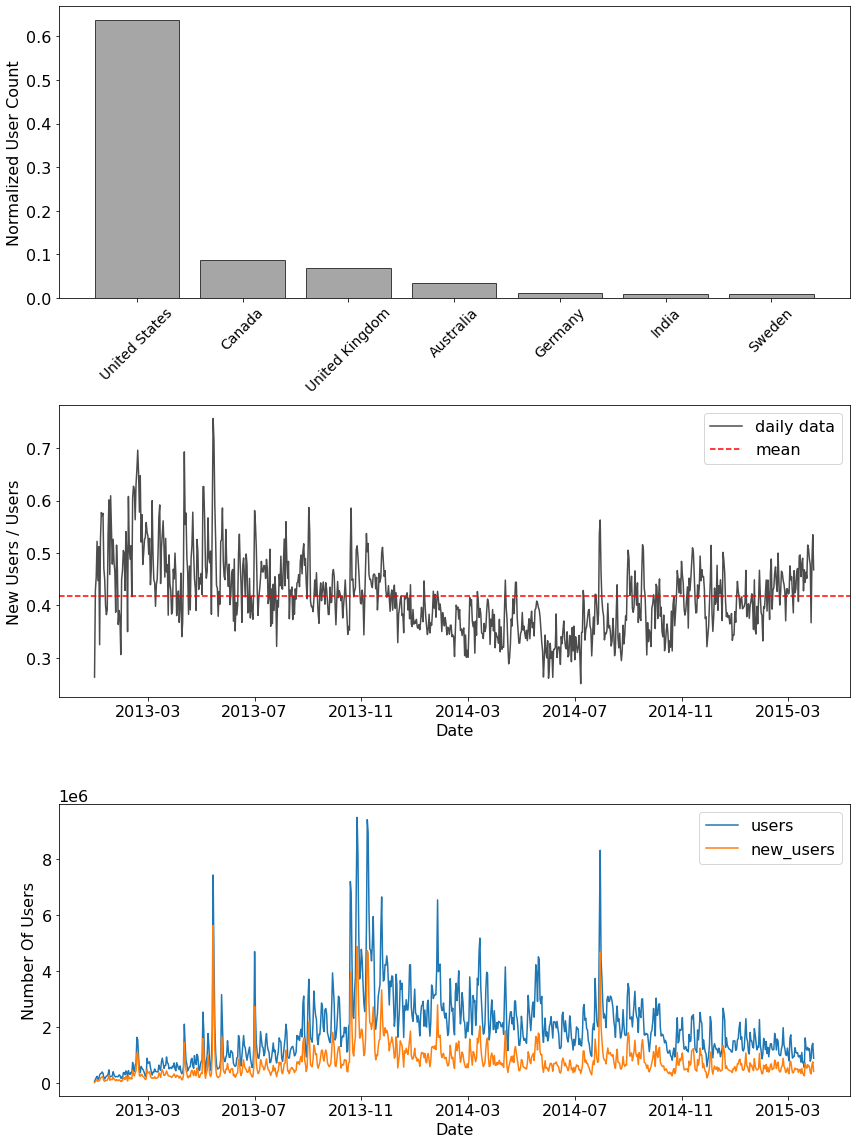

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1, 1]})

# Bar chart on top (first row)
axs[0].bar(ga_countries[0:7]['country'], ga_countries[0:7]['users_ratio'], color='gray', alpha=0.7, edgecolor='black')
axs[0].set_xticklabels(ga_countries[0:7]['country'], rotation=45, fontsize=14)
axs[0].set_ylabel('Normalized User Count', fontsize=16)

# User ratio line plot (second row)
axs[1].plot(ga_users['date'], ga_users['new_old_users_ratio'], label='daily data', color='black', alpha=0.7)
axs[1].axhline(ga_users['new_old_users_ratio'].mean(), color='red', label='mean', linestyle='--')
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=18))  # Adjust interval for less frequent dates
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1].set_ylabel('New Users / Users', fontsize=16)
axs[1].set_xlabel('Date', fontsize=16)
axs[1].legend()

# Users and new users line plot (third row, spanning full width)
axs[2].plot(ga_users['date'], ga_users['users'], label='users')
axs[2].plot(ga_users['date'], ga_users['new_users'], label='new_users')
axs[2].xaxis.set_major_locator(mdates.WeekdayLocator(interval=18))  # Use MonthLocator for less frequent date ticks
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[2].set_ylabel('Number Of Users', fontsize=16)
axs[2].set_xlabel('Date', fontsize=16)
axs[2].legend()

# Adjust layout and save as PDF
plt.tight_layout()
plt.savefig('combined_plots_ga.pdf', format='pdf', bbox_inches='tight', dpi=1200)
